In [1]:
import pandas as pd
df=pd.read_csv('data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61900 entries, 0 to 61899
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   dateRep                                                     61900 non-null  object 
 1   day                                                         61900 non-null  int64  
 2   month                                                       61900 non-null  int64  
 3   year                                                        61900 non-null  int64  
 4   cases                                                       61900 non-null  int64  
 5   deaths                                                      61900 non-null  int64  
 6   countriesAndTerritories                                     61900 non-null  object 
 7   geoId                                                       61625 non-null  object 
 

In [2]:
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


In [3]:
df.drop(['dateRep','geoId','countryterritoryCode','continentExp','Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61900 entries, 0 to 61899
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   day                      61900 non-null  int64  
 1   month                    61900 non-null  int64  
 2   year                     61900 non-null  int64  
 3   cases                    61900 non-null  int64  
 4   deaths                   61900 non-null  int64  
 5   countriesAndTerritories  61900 non-null  object 
 6   popData2019              61777 non-null  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 3.3+ MB


In [4]:
df.isnull().sum()

day                          0
month                        0
year                         0
cases                        0
deaths                       0
countriesAndTerritories      0
popData2019                123
dtype: int64

In [5]:
df['popData2019'].fillna(0,inplace=True)

In [6]:
df.isnull().sum()

day                        0
month                      0
year                       0
cases                      0
deaths                     0
countriesAndTerritories    0
popData2019                0
dtype: int64

In [7]:
df['popData2019']=(df['popData2019']/float(1000000)).round(2)
df.sample(5)

,day,month,year,cases,deaths,countriesAndTerritories,popData2019
1928,12,7,2020,0,0,Antigua_and_Barbuda,0.10
5713,2,5,2020,237,93,Belgium,11.46
16077,19,7,2020,0,0,Djibouti,0.97
26126,29,11,2020,6819,156,Hungary,9.77
30550,24,5,2020,4,0,Jordan,10.10


In [8]:
df.rename({'popData2019':'Population','countriesAndTerritories':'Countries'},axis=1,inplace=True)
df.head()

,day,month,year,cases,deaths,Countries,Population
0,14,12,2020,746,6,Afghanistan,38.04
1,13,12,2020,298,9,Afghanistan,38.04
2,12,12,2020,113,11,Afghanistan,38.04
3,11,12,2020,63,10,Afghanistan,38.04
4,10,12,2020,202,16,Afghanistan,38.04


In [9]:
df.describe()

,day,month,year,cases,deaths,Population
count,61900.000000,61900.000000,61900.000000,61900.000000,61900.000000,61900.000000
mean,15.628934,7.067157,2019.998918,1155.147237,26.055460,40.906025
std,8.841582,2.954776,0.032882,6779.224479,131.227055,152.988066
min,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,0.000000
25%,8.000000,5.000000,2020.000000,0.000000,0.000000,1.290000
50%,15.000000,7.000000,2020.000000,15.000000,0.000000,7.170000
75%,23.000000,10.000000,2020.000000,273.000000,4.000000,28.520000
max,31.000000,12.000000,2020.000000,234633.000000,4928.000000,1433.780000


In [10]:
df[df['deaths']==4928]

,day,month,year,cases,deaths,Countries,Population
59243,16,4,2020,30148,4928,United_States_of_America,329.06


In [11]:
df[df['cases']==234633]

,day,month,year,cases,deaths,Countries,Population
59003,12,12,2020,234633,3343,United_States_of_America,329.06


In [12]:
df[df['cases'].lt(0)]

,day,month,year,cases,deaths,Countries,Population
6311,20,5,2020,-209,0,Benin,11.80
10935,10,3,2020,-9,1,Cases_on_an_international_conveyance_Japan,0.00
16906,7,9,2020,-8261,3800,Ecuador,17.37
17024,12,5,2020,-50,18,Ecuador,17.37
17027,9,5,2020,-1480,50,Ecuador,17.37
17029,7,5,2020,-2461,49,Ecuador,17.37
20558,3,6,2020,-766,107,France,67.01
29276,20,6,2020,-148,47,Italy,60.36
30170,11,9,2020,-6,0,Jersey,0.11
30491,22,7,2020,-110,0,Jordan,10.10


In [13]:
df.loc[df['cases']<0,'cases']*=-1
df.loc[df['deaths']<0,'deaths']*=-1

In [14]:
df[df['cases'].lt(0)]

,day,month,year,cases,deaths,Countries,Population


In [15]:
df.describe()

,day,month,year,cases,deaths,Population
count,61900.000000,61900.000000,61900.000000,61900.000000,61900.000000,61900.000000
mean,15.628934,7.067157,2019.998918,1155.675864,26.133489,40.906025
std,8.841582,2.954776,0.032882,6779.134381,131.211538,152.988066
min,1.000000,1.000000,2019.000000,0.000000,0.000000,0.000000
25%,8.000000,5.000000,2020.000000,0.000000,0.000000,1.290000
50%,15.000000,7.000000,2020.000000,15.000000,0.000000,7.170000
75%,23.000000,10.000000,2020.000000,274.000000,4.000000,28.520000
max,31.000000,12.000000,2020.000000,234633.000000,4928.000000,1433.780000


In [16]:
df.sort_values(by=['year','month','day'],ascending=[True,True,True],inplace=True,ignore_index=True)

dMin=df.loc[0].day
mMin=df.loc[0].month
yMin=df.loc[0].year

dMax=df.loc[df.shape[0]-1].day
mMax=df.loc[df.shape[0]-1].month
yMax=df.loc[df.shape[0]-1].year

from datetime import date

d1=date(yMin,mMin,dMin)
d2=date(yMax,mMax,dMax)

corona_days=(d2-d1).days

print('days =',corona_days)

corona_global_deaths_AVG=df['deaths'].sum() / corona_days
corona_global_cases_AVG=df['cases'].sum() / corona_days

print(f'corona_global_deaths_AVG = {int(corona_global_deaths_AVG)}')
print(f'corona_global_cases_AVG = {int(corona_global_cases_AVG)}')

days = 349
corona_global_deaths_AVG = 4635
corona_global_cases_AVG = 204975


<BarContainer object of 2 artists>

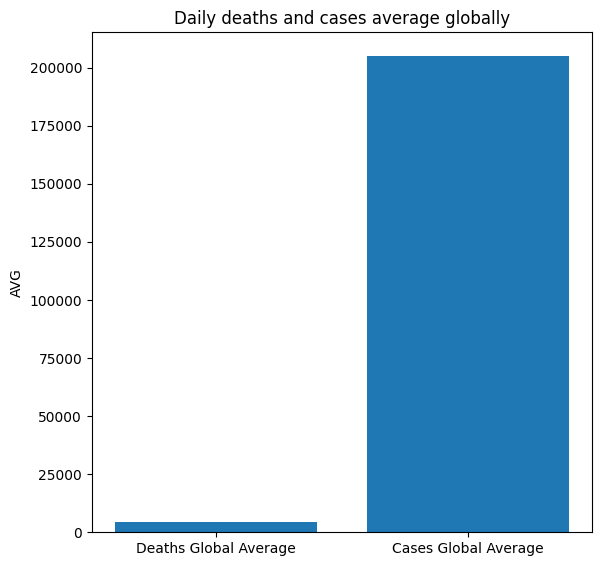

In [17]:
import matplotlib.pyplot as plt

x=['Deaths Global Average','Cases Global Average']
y=[corona_global_deaths_AVG,corona_global_cases_AVG]

fig= plt.figure(figsize=(5,5))

ax=fig.add_axes([.1,.1,1,1])

ax.set_ylabel('AVG')
ax.set_title('Daily deaths and cases average globally')

ax.bar(x,y)

In [21]:
avg_by_countries= df.groupby('Countries')[['deaths','cases']].agg([sum]).sort_values(by=('deaths','sum'),ascending=False)
avg_by_countries=avg_by_countries/corona_days
avg_by_countries

,deaths,cases
,sum,sum
Countries,,
United_States_of_America,857.240688,46580.957020
Brazil,519.776504,19776.366762
India,410.759312,28321.203438
Mexico,326.512894,3581.787966
Italy,185.048711,5283.690544
...,...,...
Cambodia,0.000000,1.028653
Seychelles,0.000000,0.535817


<AxesSubplot: xlabel='Countries'>

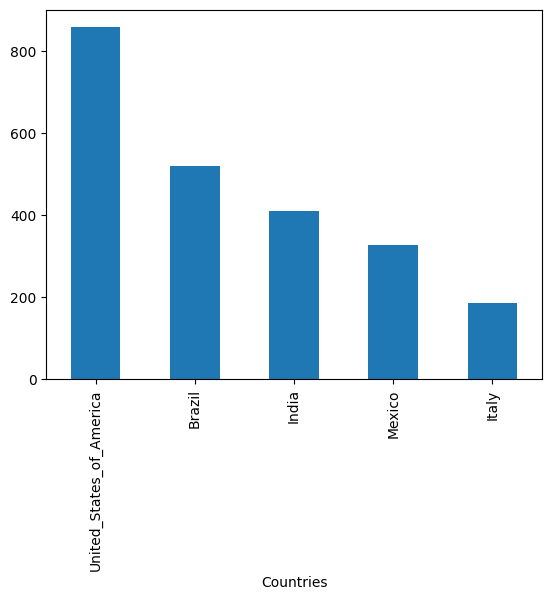

In [23]:
avg_by_countries['deaths']['sum'].head(5).plot(kind='bar')

<AxesSubplot: xlabel='Countries'>

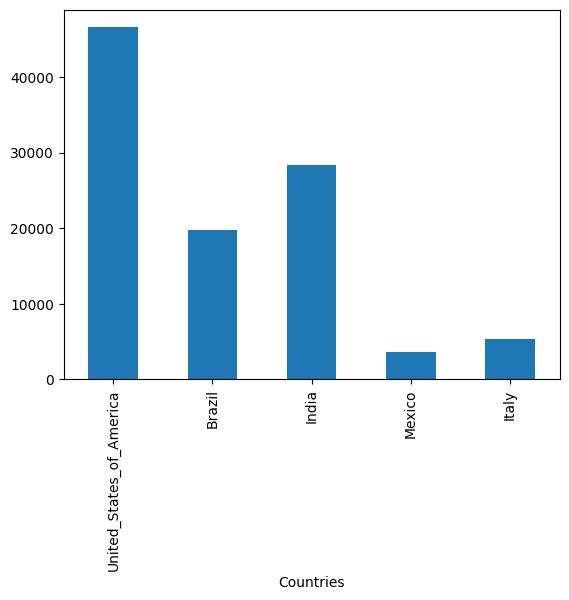

In [26]:
avg_by_countries['cases']['sum'].head(5).plot(kind='bar')

In [31]:
sum_by_month= df.groupby('month')[['deaths','cases']].agg([sum]).sort_values(by=('month'))
sum_by_month

,deaths,cases
,sum,sum
month,,
1,213,9799
2,2708,75422
3,35814,723756
4,189180,2341230
5,143978,2901710
6,134131,4251355
7,166203,7067744
8,179532,7966606


C:\Users\asus\AppData\Local\Temp\ipykernel_18516\1687573145.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x)


([<matplotlib.patches.Wedge at 0x1cc657b1ae0>,
 [Text(1.0999999058878804, 0.0004550237954484424, '1'),
  Text(1.0999796256872296, 0.006695003583435564, '2'),
  Text(1.096402468403153, 0.08889109786403482, '3'),
  Text(0.955774385506939, 0.544513841889105, '4'),
  Text(0.43436617069113703, 1.0106067631671174, '5'),
  Text(-0.14714232734189037, 1.0901142763510678, '6'),
  Text(-0.7231982497295744, 0.8288451553746817, '7'),
  Text(-1.0818467517381078, 0.1990165966790333, '8'),
  Text(-0.9748414426369773, -0.5095921523311139, '9'),
  Text(-0.45108820274066697, -1.0032544210459253, '10'),
  Text(0.4839606132591579, -0.9878168478082463, '11'),
  Text(1.0526783222376048, -0.31916821566537806, '12')],
 [Text(0.5999999486661165, 0.0002481947975173322, '0.0'),
  Text(0.5999888867384888, 0.0036518201364193984, '0.2'),
  Text(0.5980377100380834, 0.04848605338038262, '2.2'),
  Text(0.5213314830037848, 0.29700755012133, '11.7'),
  Text(0.23692700219516563, 0.5512400526366095, '8.9'),
  Text(-0.08025

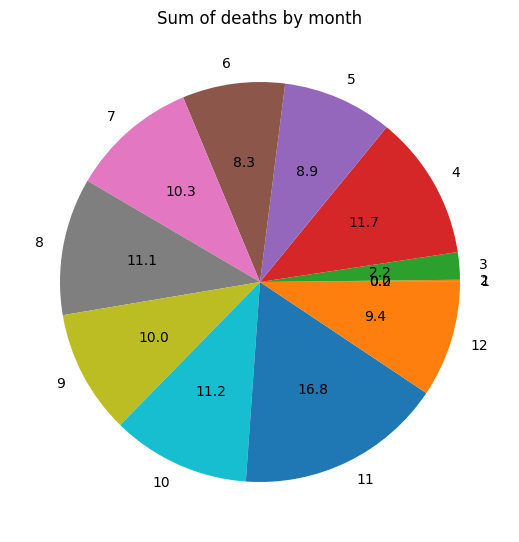

In [45]:
x=sum_by_month.index.to_list()
y=sum_by_month['deaths']['sum']
fig=plt.figure(figsize=(5,5))
ax=fig.add_axes([.1,.1,1,1])
ax.set_title('Sum of deaths by month')
ax.set_xticklabels(x)
ax.pie(y,labels=x,autopct='%.1f')

C:\Users\asus\AppData\Local\Temp\ipykernel_18516\2317607908.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x)


([<matplotlib.patches.Wedge at 0x1cc6597c190>,
 [Text(1.0999998981473076, 0.00047336657386540124, '1'),
  Text(1.0999904228021575, 0.004590179030358541, '2'),
  Text(1.0991519515746644, 0.04318549929787437, '3'),
  Text(1.0834145952834315, 0.19029664927906187, '4'),
  Text(1.0113932827816072, 0.4325316491821658, '5'),
  Text(0.8282506176283756, 0.7238790744304014, '6'),
  Text(0.38281469067510837, 1.0312385333196783, '7'),
  Text(-0.3301105095545072, 1.0492983615167155, '8'),
  Text(-0.9411838913481727, 0.5693618205207575, '9'),
  Text(-1.0322497790964784, -0.38007945689720113, '10'),
  Text(0.06510053297908176, -1.0980719104893994, '11'),
  Text(1.021710354184395, -0.4075634332866457, '12')],
 [Text(0.5999999444439859, 0.00025819994938112794, '0.0'),
  Text(0.5999947760739041, 0.002503734016559204, '0.1'),
  Text(0.5995374281316351, 0.02355572688974966, '1.0'),
  Text(0.5909534156091444, 0.10379817233403374, '3.3'),
  Text(0.5516690633354221, 0.23592635409936313, '4.1'),
  Text(0.4517

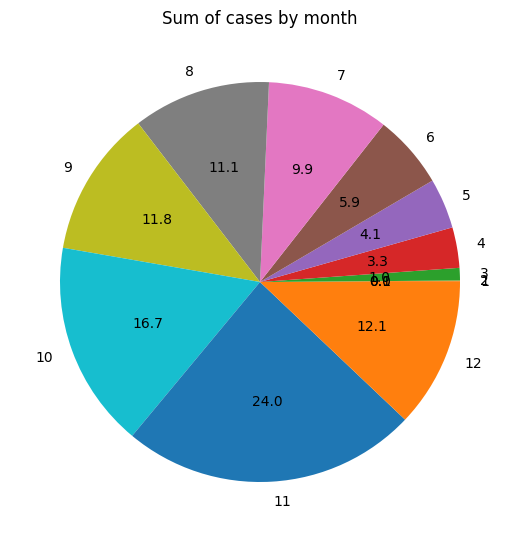

In [46]:
x=sum_by_month.index.to_list()
y=sum_by_month['cases']['sum']
fig=plt.figure(figsize=(5,5))
ax=fig.add_axes([.1,.1,1,1])
ax.set_title('Sum of cases by month')
ax.set_xticklabels(x)
ax.pie(y,labels=x,autopct='%.1f')

In [58]:
sum_by_month_country=df.groupby(['Countries','month'])[['deaths','cases']].agg([sum]).sort_index()
sum_by_month_country

deaths  cases
                     sum    sum
Countries   month              
Afghanistan 1          0      0
            2          0      1
            3          4    140
            4         56   1808
            5        189  12576
...                  ...    ...
Zimbabwe    8        143   3320
            9         32   1425
            10        14    525
            11        34   1588
            12        31   1296

[2221 rows x 2 columns]

In [60]:
sum_by_month_country.loc[['China','Italy']]

deaths   cases
                   sum     sum
Countries month               
China     1        213    9687
          2       2624   69641
          3        472    2886
          4       1328    1703
          5          1     184
          6          3     652
          7         18    2709
          8         63    2406
          9         17     633
          10         0     771
          11         0     515
          12         0     234
Italy     1          0       3
          2         21     885
          3      11570  100851
          4      16091  101852
          5       5658   29073
          6       1466    8068
          7        388    6722
          8        345   21060
          9        398   44793
          10      2446  334663
          11     16583  937504
          12      9616  258534

In [64]:
corona_by_country=df.groupby('Countries')
deaths_by_country_sum=corona_by_country['deaths'].sum()
deaths_by_country_sum=deaths_by_country_sum.sort_values(ascending=False).head(5)
deaths_by_country_sum

Countries
United_States_of_America    299177
Brazil                      181402
India                       143355
Mexico                      113953
Italy                        64582
Name: deaths, dtype: int64

C:\Users\asus\AppData\Local\Temp\ipykernel_18516\4281512285.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x,rotation=60,horizontalalignment='center')


<BarContainer object of 5 artists>

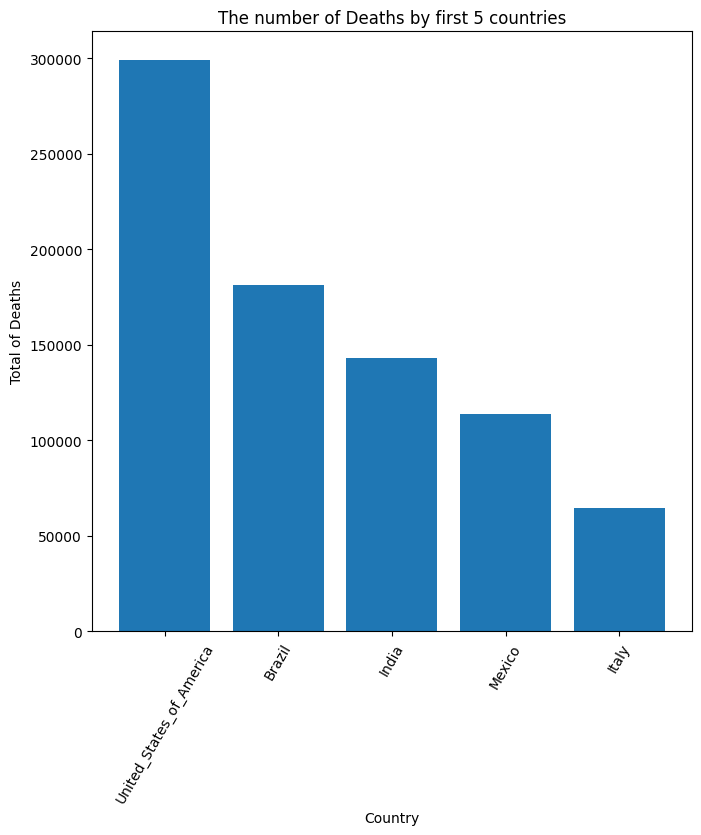

In [71]:
x=deaths_by_country_sum.index.to_list()
y=deaths_by_country_sum
fig=plt.figure(figsize=(6,6))
ax=fig.add_axes([.1,.1,1,1])
ax.set_xlabel('Country')
ax.set_ylabel('Total of Deaths')
ax.set_title('The number of Deaths by first 5 countries')
ax.set_xticklabels(x,rotation=60,horizontalalignment='center')
ax.bar(x,y)

In [83]:
def time_series_by_country(country):

    corona_by_day_series=df[df['Countries']==country].sort_values(by=['year','month','day']).reset_index(drop=True)

    x=corona_by_day_series.index
    y=corona_by_day_series[['deaths','cases']]

    max_deaths_v=y['deaths'].max()
    max_deaths_i=corona_by_day_series['deaths'].idxmax()

    max_cases_v=y['cases'].max()
    max_cases_i=corona_by_day_series['cases'].idxmax()

    fig=plt.figure()
    ax=fig.add_axes([.1,.1,1,1])

    ax.set_xlabel('Over time')
    ax.set_ylabel('Total of Deaths & Cases')
    ax.set_title('Sum of global deaths & cases over the time')
    ax.set_xticklabels(' ')

    ax.annotate('Max Deaths \n {} deaths'.format(max_deaths_v),xy=(max_deaths_i,max_deaths_v),xytext=(int(max_deaths_i)+5,int(max_deaths_v)+50),arrowprops=dict(facecolor='red'))
    ax.annotate('Max Cases \n {} cases'.format(max_cases_v),xy=(max_cases_i,max_cases_v),xytext=(int(max_cases_i)+5,int(max_cases_v)+50),arrowprops=dict(facecolor='red'))
    ax.plot(x,y)
    

C:\Users\asus\AppData\Local\Temp\ipykernel_18516\2199901242.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(' ')


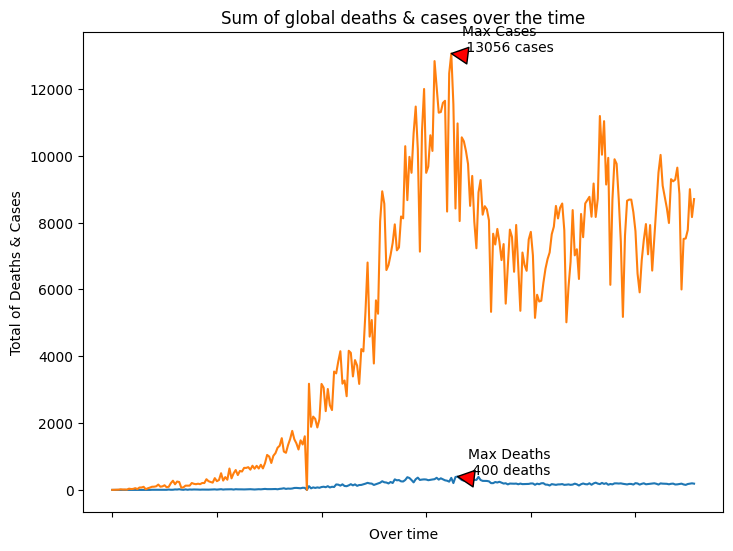

In [86]:
time_series_by_country('Colombia')